# Stock Price Prediction Model

In [4]:
#Import Packages

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Observations - Extract Data from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


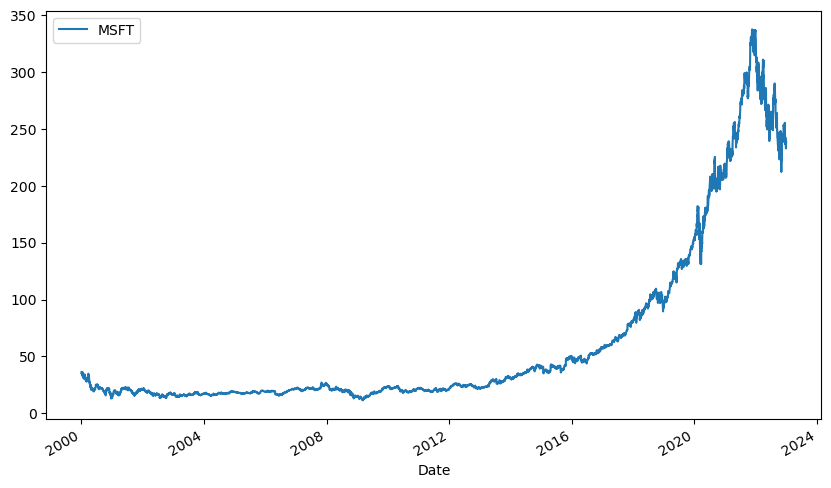

In [5]:
# Extract data from Yahoo Finance
ticker = 'MSFT' 
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start='2000-1-1',end='2022-12-31')['Adj Close'] #from year 2000 to 2022

# Plot MSFT closing prices
stock_data.plot(figsize=(10, 6));

### Distributions - Calculate Historical Returns and Statistical Measures

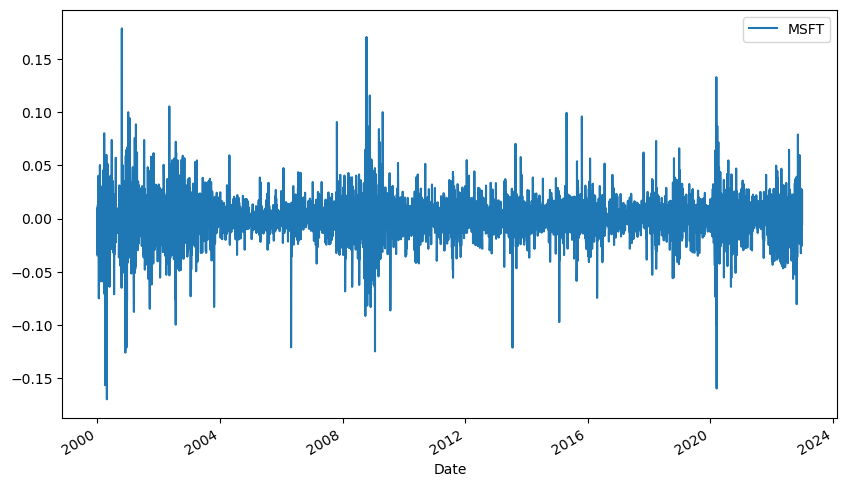

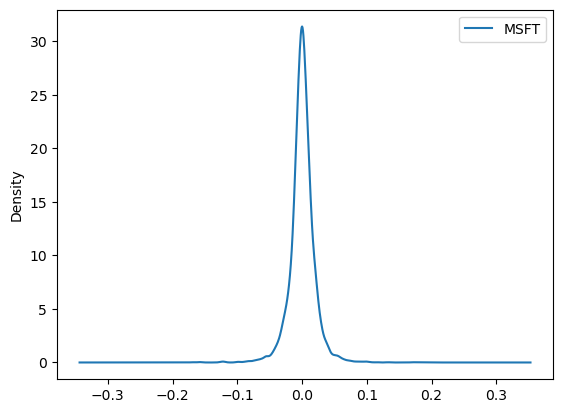

In [6]:
# Calculate historical log returns

log_returns = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10,6));

# Show the distribution of the log returns
log_returns.plot.density();


Stock market returns are typically measured as the percentage change in the value of an investment over a certain period of time. 

In [7]:
# Calculate key statistic measures

mean = log_returns.mean()
Variance = log_returns.var()
STD = log_returns.std()
print("The mean of the log returns is:", mean)
print("The Variance of the log returns is:", Variance)
print("The Standard Deviation of the log returns is:", STD)
print("The data is relatively dispersed, and it may have a distribution that is not perfectly symmetric.")

The mean of the log returns is: MSFT    0.000326
dtype: float64
The Variance of the log returns is: MSFT    0.000376
dtype: float64
The Standard Deviation of the log returns is: MSFT    0.019388
dtype: float64
The data is relatively dispersed, and it may have a distribution that is not perfectly symmetric.


### Statistical Interpretation

In a financial context, where log returns are often analyzed, a mean being smaller than the variance could imply that the returns have some **level of volatility and dispersion**. It could also indicate **periods of both positive and negative returns**, potentially leading to a **distribution that is not perfectly symmetric**.

It may also imply that the data has a **relatively high dispersion or spread around the mean**.

**Distribution Shape**: The relationship between the mean and variance can also provide some insights into the shape of the data distribution. In a **normal distribution (bell-shaped curve)**, the mean and variance are equal. When the **mean is significantly smaller than the variance**, like in this case, it might suggest a **distribution that is right-skewed**, meaning it has a **longer tail on the right side**.

### Simulations - Simulate Future Daily Returns and Future Prices

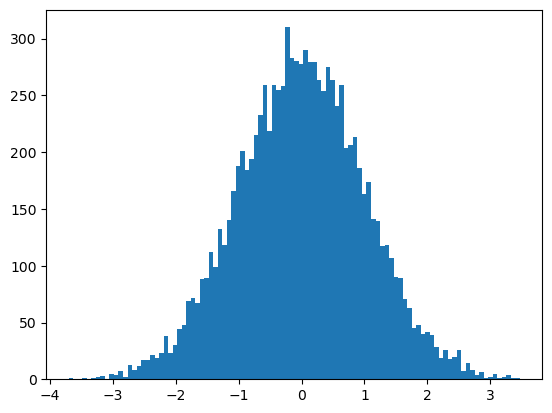

In [9]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [10]:
# Simulate future daily returns using the above method
t_intervals = 250    #might represent daily data points
simulations = 10000  #number of scenarios or paths you want to simulate.

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

This line generates a NumPy array daily_logreturns_simulated with dimensions (t_intervals, simulations). It simulates log returns for multiple scenarios. Here's what happens in this line:

**daily_logreturns_simulated**
**STD.values**: Assuming STD is a Pandas DataFrame or Series, .values is used to extract the underlying NumPy array of standard deviations. These standard deviations are used to **scale the random numbers** in the simulation.

**np.random.rand(t_intervals, simulations)**: This generates an array of random numbers drawn from a **uniform distribution between 0 and 1** with dimensions (t_intervals, simulations). These random numbers are used to introduce **stochasticity** in the simulation.

**norm.ppf()**: This function is used to **transform random numbers from a uniform distribution to a normal distribution** with **mean 0 and standard deviation 1 (standard normal distribution)**. It's commonly used in **financial simulations to introduce randomness** with a known statistical distribution.

**STD.values** * norm.ppf(...): This scales the random numbers by the standard deviations to obtain simulated log returns.

**daily_simplereturns_simulated**: This line calculates daily simple returns from the simulated log returns. Simple returns are obtained by taking the exponential of the simulated log returns. The np.exp() function is used for this purpose. Simple returns are often used for financial modeling and analysis.

In summary, this above code is simulating daily simple returns for a financial instrument over a specified number of time intervals and scenarios. It's a common technique used in **financial risk analysis, Monte Carlo simulations**, and other financial modeling to understand the **potential range of outcomes for an investment or portfolio**. The code generates multiple scenarios of returns, each with a different random component based on a **normal distribution**.

In [11]:
# Using returns, calculate future price progression in each simulation

# Latest known stock price for MSFT
last_price = stock_data.iloc[-1] 
#It uses the .iloc method to access the last row of the DataFrame (the most recent data point).

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated) #Initializes an array for storing simulated stock prices.
# creates an array that is filled with zeros having same shape (dimensions) as DataFrame named daily_simplereturns_simulated.

# Set the first row to the starting stock price
price_list[0] = last_price # Initializes the first simulated stock price to be equal to the last known stock price.

price_list 

array([[238.19471741, 238.19471741, 238.19471741, ..., 238.19471741,
        238.19471741, 238.19471741],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

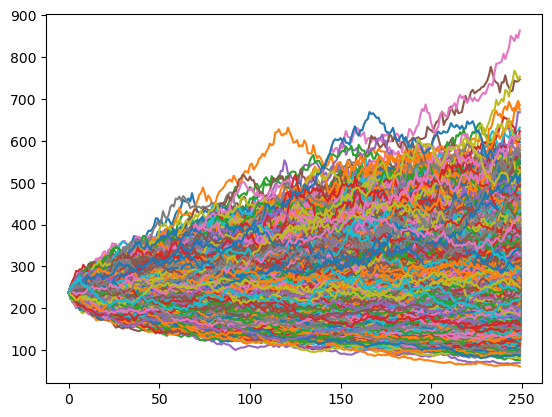

In [12]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated[t] #updates the price_list at each time period t.

# Plot simulated future MSFT prices
plt.plot(price_list);

### Including Drift

In [13]:
# Calculate drift
drift = mean - (0.5*Variance) 


# Simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

print("The daily_simplereturns_simulated_withdrift values are:", daily_simplereturns_simulated_withdrift);

The daily_simplereturns_simulated_withdrift values are: [[0.99548012 1.01755586 1.0218399  ... 0.99041539 1.01317652 1.01861054]
 [0.97832274 1.0124229  1.02887531 ... 0.98056025 1.00592312 0.98552364]
 [1.01287314 0.95834962 0.99516082 ... 0.99911012 0.99623325 0.97179149]
 ...
 [1.00469691 1.00459784 0.9940206  ... 1.01319775 0.98715243 1.02590952]
 [1.00562948 0.99310724 0.96902155 ... 0.99768848 1.01940949 1.00457006]
 [1.00130893 1.00764357 0.98335311 ... 1.02264739 0.98917653 1.00708937]]


**Drift** calculates the drift term for a stochastic process. In finance, this concept is often used in the context of **modeling stock prices** or other asset prices under a stochastic framework, such as the **Geometric Brownian Motion model** used in the **Black-Scholes option pricing model**.

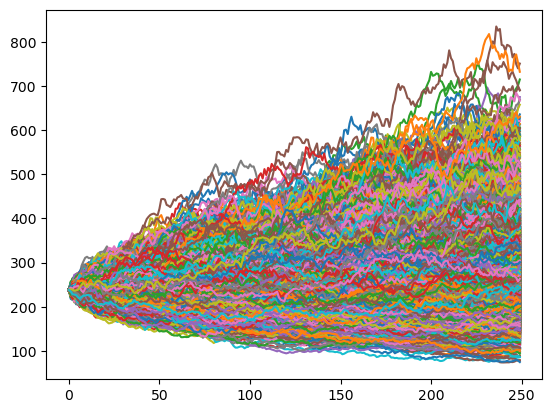

In [14]:
# Create a variable for the latest price of MSFT
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated_withdrift[t]

# Plot simulated future MSFT prices
plt.plot(price_list);

### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [15]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"Worst Simulation $/share: {WorstSim}")
print(f"Avg Simulation $/share: {AvgSim}")    #$ represents price
print(f"Best Simulation $/share: {BestSim}")

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()

UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices 
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${LowerInterval_1SD} and ${round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD,2)} and ${round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst Simulation $/share: 74.77
Avg Simulation $/share: 258.2
Best Simulation $/share: 750.45

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $177.31340985948157 and $339.09
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $96.42 and $419.98


The above code is **setting up and calculating confidence intervals** for the **future price** of a financial instrument (e.g., a stock) **after 250 days**. Here's a breakdown of what the code is doing and what it implies:

1. **Mean and Standard Deviation Calculation**:
   - `Mean_Day250Prices`: It calculates the mean (average) of the prices in the `price_list` for the last data point in the list. This presumably represents the current price.
   - `SD_Day250Prices`: It calculates the standard deviation of the prices in the `price_list` for the last data point. The standard deviation is a measure of how spread out the data is from the mean.

2. **Confidence Interval Calculation**:
   - `UpperInterval_1SD` and `LowerInterval_1SD`: These variables calculate the **upper and lower bounds of a 1 standard deviation (1σ) confidence interval**. A **1σ confidence interval** is a range of prices within which it is estimated that there is a **68% probability** that the **future price after 250 days will fall**.

   - `UpperInterval_2SD` and `LowerInterval_2SD`: These variables calculate the **upper and lower bounds of a 2 standard deviation (2σ) confidence interval**. A **2σ confidence interval** is a wider range, and it is estimated that there is a **95% probability** that the **future price after 250 days will fall** within this range.

3. **Printing the Results**:
   - The code prints out the calculated confidence intervals and what they represent:
     - For 1σ: "68% confident that price after 250 days will fall between" a certain range.
     - For 2σ: "95% confident that price after 250 days will fall between" a wider range.

These confidence intervals are based on statistical analysis and provide a way to **estimate the range within which future prices are likely to fall**, given the current mean and standard deviation of historical price data. It's important to note that these are statistical estimates, and actual price movements can vary significantly from these estimates. 

Financial professionals and investors use such **confidence intervals** to make informed decisions and manage risk in their investments.

By **Ibrahim Fadhili**